In [16]:
from sklearn.datasets import make_classification
import numpy as np
import random 
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
import matplotlib.pyplot as plt

[0.9        1.32427248 0.00692951]


(-3.0, 2.0)

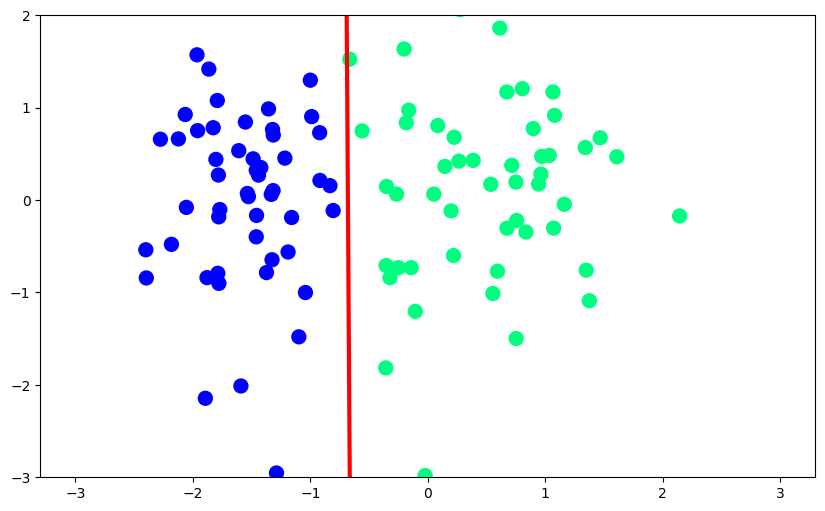

In [17]:
def step(n):
    if(n>0): return 1
    else: return 0
def perceptron_trick(x,y):
    x = np.insert(x,0,1,axis=1)
    epochs = 1000
    w = np.ones(x.shape[1])
    learning_rate = 0.1

    for i in range(epochs):
        random_idx = np.random.randint(0,100)
        y_hat = step(np.dot(x[random_idx],w))
        w = w + learning_rate * (y[random_idx] - y_hat) * x[random_idx]

    # We got W0 + W1X1 + W2X2 = 0
    #  slope = -W1/W2 , intercept = -W0/W2
    print(w) 
    return -w[1]/w[2], -w[0]/w[2]

m,b = perceptron_trick(X,y)

x_val = np.linspace(-3,3,100)
y_val = m*x_val + b

plt.figure(figsize=(10,6))
plt.plot(x_val,y_val,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Sigmoid


[ 2.66085523  4.54400004 -0.10065417]


(-3.0, 2.0)

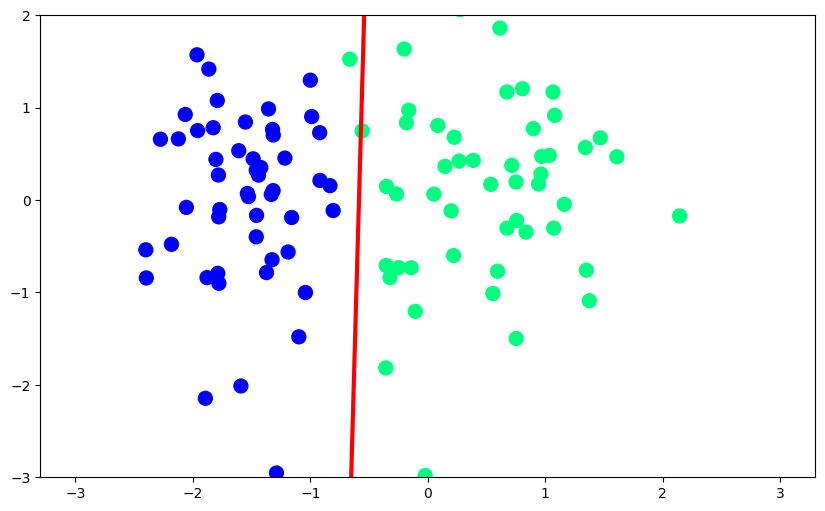

In [18]:
import math
def sigmoid(z):
    return 1/(1+pow(math.e,-z))

def Sigmoid_LgR(x,y):
    x = np.insert(x,0,1,axis=1)
    epochs = 1000
    w = np.ones(x.shape[1])
    learning_rate = 0.1

    for i in range(epochs):
        random_idx = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(x[random_idx],w))
        w = w + learning_rate * (y[random_idx] - y_hat) * x[random_idx]

    # We got W0 + W1X1 + W2X2 = 0
    #  slope = -W1/W2 , intercept = -W0/W2
    print(w) 
    return -w[1]/w[2], -w[0]/w[2]

m,b = Sigmoid_LgR(X,y)

x_val = np.linspace(-3,3,100)
y_val = m*x_val + b

plt.figure(figsize=(10,6))
plt.plot(x_val,y_val,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Sigmoid vs Step vs Sklearn

In [19]:
X1, y1 = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X1,y1)
m3 = -(lor.coef_[0][0]/lor.coef_[0][1])
b3 = -(lor.intercept_/lor.coef_[0][1])

[2.63924901 2.29052099 0.16495289]
[1.2        1.08682872 0.52024363]


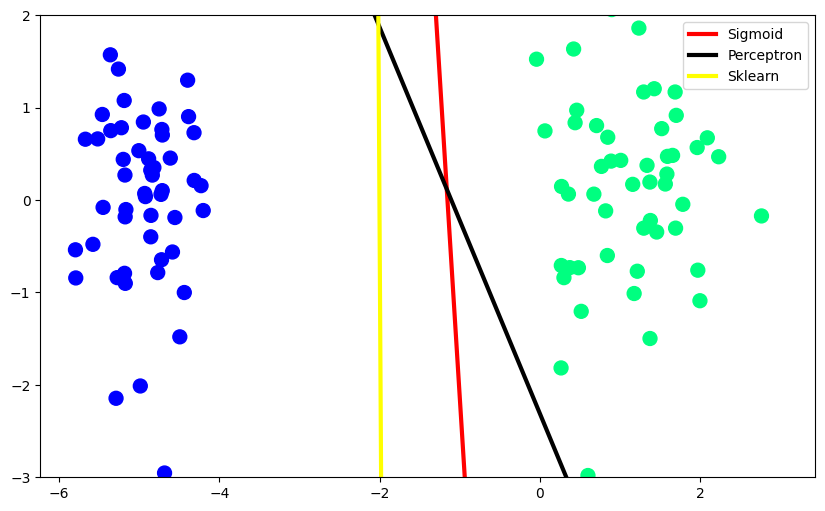

In [20]:
m1,b1 = Sigmoid_LgR(X1,y1)
m2,b2 = perceptron_trick(X1,y1)

x_val = np.linspace(-3,3,100)
y_val1 = m1*x_val + b1
y_val2 = m2*x_val + b2
y_val3 = m3*x_val + b3

plt.figure(figsize=(10,6))
plt.plot(x_val,y_val1,color='red',linewidth=3,label="Sigmoid")
plt.plot(x_val,y_val2,color='black',linewidth=3,label="Perceptron")
plt.plot(x_val,y_val3,color='yellow',linewidth=3,label="Sklearn")
plt.scatter(X1[:,0],X1[:,1],c=y1,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()